# Predicting the Sale Price of Bulldozers Using Machine Learning

This is my learning project when taking Machine Learning 0-Master course on Udemy. The goal of predicting the sale price of bulldozer, and this is a time-series related project. The original project is from Kaggle.

## 1. Problem definition
How well can we predict the future sale price of a bulldozer, giving the characterics and the previous examples of how much similar bulldozers have been sold for?

## 2. Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

View and download the benchmark code from Github:
https://github.com/benhamner/BluebookForBulldozers/tree/master/Benchmark


The data  is split into three parts:

1. Train.csv is the training set, which contains data through the end of 2011.

2. Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

3. Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluataion
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more the evaluation of the this project, please check:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

## 4. Features

Kaggle provides a data dictionary detailing all the features of the dataset. You can download the data dictionary 
here:

https://www.kaggle.com/c/bluebook-for-bulldozers/data?select=Data+Dictionary.xlsx

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# import training and validation sets

df = pd.read_csv("../project_bulldozer/bluebook-for-bulldozers/TrainAndValid.csv", low_memory = False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [12]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

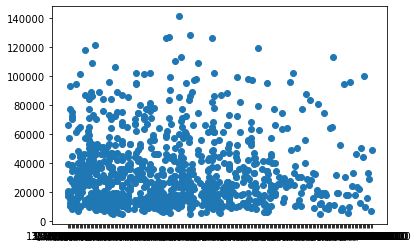

In [15]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

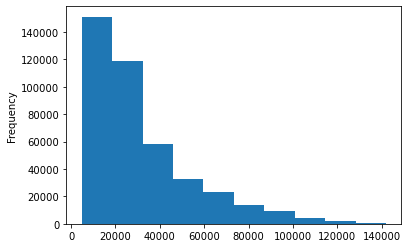

In [17]:
df.SalePrice.plot.hist();

In [19]:
df.saledate.dtype # original data type before parse_date

dtype('O')

## Parsing Dates

When we work with series data, we want to enrich the date & time component as much as possible. We can do that by telling pandas which of our columns has dates in using `parse_date` parameter.

In [3]:
# import data again, but this time with parse_date

df = pd.read_csv("../project_bulldozer/bluebook-for-bulldozers/TrainAndValid.csv", 
                 low_memory = False,
                 parse_dates = ['saledate'])

In [21]:
df.saledate.dtype # new data type after parse_date

dtype('<M8[ns]')

In [4]:
df.saledate.value_counts()

2009-02-16    1932
2012-02-13    1598
2011-02-15    1352
2008-02-19    1300
2010-02-15    1219
              ... 
2012-02-04       1
2010-04-03       1
2005-03-03       1
2006-07-06       1
2007-05-07       1
Name: saledate, Length: 4013, dtype: int64

In [22]:
df.saledate[:1000] # a clean date data

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

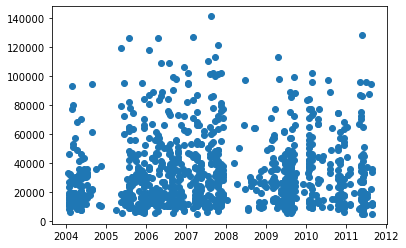

In [26]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

In [27]:
df.head(20) # too many columns, can't see them all, so we transpost the data

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500.0,1001274,4605,121,3.0,2004,508.0,Low,2008-12-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000.0,772701,1937,121,3.0,1993,11540.0,High,2004-08-26,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000.0,902002,3539,121,3.0,2001,4883.0,High,2005-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500.0,1036251,36003,121,3.0,2008,302.0,Low,2009-08-27,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,65000.0,1016474,3883,121,3.0,1000,20700.0,Medium,2007-08-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [28]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.000000,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.000000,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.000000,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [29]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

## Sort data frame by sorting saledate

When working with time series data, it is a good idea to sort it by date

In [32]:
df.sort_values(by =["saledate"],inplace=True,ascending =True)

In [33]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Make a copy of the original data frame

We make a copy of the original data frame so we can manipulate the copy, we have just got out from our data

In [5]:
# make a copy
df_temp = df.copy()

In [49]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


## Add datetime parameters for `saledate`  column

In [6]:
df_temp['saleYear'] = df_temp.saledate.dt.year
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayOfWeek'] = df_temp.saledate.dt.dayofweek
df_temp['saleDayOfYear'] = df_temp.saledate.dt.dayofyear

In [51]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [7]:
# Nowe we have enriched our DataFrame with date time features, now we can remove "saledate"
df_temp.drop("saledate", axis =1, inplace = True)

In [8]:
df_temp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [53]:
# check the values of different column
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [54]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

### Convert string to category 

One way we can turn all of our data into numbers is by converting them into pandas categories.

We can check the different datatypes compitable with pandas: (google pandas api datatype)
https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html

In [56]:
pd.api.types.is_string_dtype(df_temp["Travel_Controls"])

True

In [63]:
# Find the columns which contain astrings
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [7]:
# This will convert astring into category
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [65]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [66]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [67]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [69]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas now we have a way to access all our data in the form of numbers. 
But we still have a bunch of missing data.

In [71]:
df_temp.isnull().sum()/ len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data

In [8]:
# Export current temp data frame
df_temp.to_csv("../project_bulldozer/train_tempt.csv", index = False)

In [12]:
# Import preprocessed data

df_temp = pd.read_csv("../project_bulldozer/train_tempt.csv", low_memory = False)

In [74]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Fill in missing value

### Fill nummerical missing values first

In [77]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [8]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [13]:
# Fill the numeric row with mediam
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
        # Add a binary column which tells us was the data missing
            df_temp[label + "_is_missing "] = pd.isnull(content)
        # Fill missing numeric values with mediam
            df_temp[label] = content.fillna(content.median())

In [88]:
# Check if there is any null numeric values

for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [104]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 59 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SalesID                               412698 non-null  int64  
 1   SalePrice                             412698 non-null  float64
 2   MachineID                             412698 non-null  int64  
 3   ModelID                               412698 non-null  int64  
 4   datasource                            412698 non-null  int64  
 5   auctioneerID                          412698 non-null  float64
 6   YearMade                              412698 non-null  int64  
 7   MachineHoursCurrentMeter              412698 non-null  float64
 8   UsageBand                             73670 non-null   object 
 9   fiModelDesc                           412698 non-null  object 
 10  fiBaseModel                           412698 non-null  object 
 11  

In [109]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Filling and tuning categorical variables into numbers

In [110]:
# Check for columns which are not numbers

for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [113]:
pd.Categorical(df_temp['state'])

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming']

In [14]:
# Turn categorical variables into numbers and fill missing

for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary columns to indicate weather sample had missing values
        df_temp[label+"_is_missing"] = pd.isnull(content)
        # Turn categorical variables into numbers and add 1 (to avoid negative values)
        df_temp[label] = pd.Categorical(content).codes+1

In [118]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [12]:
# Check if there still is missing value:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## 5. Modelling

In [ ]:
%%time
# to estimate how much time is needed to run the code
# Instantiate the moedel
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1,
                             random_state =42)

# Fit the model
model.fit(df_temp.drop('SalePrice', axis = 1), df_temp['SalePrice'])

In [ ]:
# Score the model

model.score(df_temp.drop('SalePrice', axis = 1), df_temp['SalePrice'])

In [15]:
# split the data into train and validation set
df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [16]:
# Split the data into X and Y

X_train, Y_train = df_train.drop("SalePrice", axis = 1), df_train["SalePrice"]
X_val, Y_val = df_val.drop("SalePrice", axis =1), df_val["SalePrice"]

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape


((401125, 102), (401125,), (11573, 102), (11573,))

In [ ]:
%%time
# to estimate how much time is needed to run the code (the whole dataset)
# Instantiate the moedel
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1,
                             random_state =42)

# Fit the model
model.fit(X_train, Y_train)

In [8]:
%%time
# Reduce the samples by setting max_samples
from sklearn.ensemble import RandomForestRegressor
model_reduce = RandomForestRegressor(n_jobs = -1,
                                     random_state = 42,
                                     max_samples = 100000)
model_reduce.fit(X_train, Y_train)

CPU times: user 11min 13s, sys: 8.04 s, total: 11min 21s
Wall time: 8min 52s


RandomForestRegressor(max_samples=100000, n_jobs=-1, random_state=42)

## Build an evaluation fucntion:

In [17]:
# Create an evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(Y_test, Y_preds):
  '''
  Caculate root mean square log error between prediction and true labels
  '''

  return np.sqrt (mean_squared_log_error(Y_test, Y_preds))

# Create function to evaluate model on a few different levels
def show_score(load_job_model):
  train_preds = load_job_model.predict(X_train)
  val_preds = load_job_model.predict(X_val)
  scores = {"Training MAE":mean_absolute_error(Y_train, train_preds),
            "Valid MAE":mean_absolute_error(Y_val, val_preds),
            "Training RMSLE": rmsle(Y_train, train_preds),
            "Valid RMSLE":rmsle(Y_val, val_preds),
            "Training R^2":r2_score(Y_train, train_preds),
            "Val R^2":r2_score(Y_val, val_preds)}

  return scores

In [14]:
show_score(model_reduce)

{'Training MAE': 3584.964344406357,
 'Valid MAE': 6166.604545061782,
 'Training RMSLE': 0.1752621475158147,
 'Valid RMSLE': 0.25633944505536393,
 'Training R^2': 0.9391080848951213,
 'Val R^2': 0.8724006649259082}

## Hyperparameter tuning with RandomizedSearchCV


In [10]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":np.arange(10, 100, 10),
           "max_depth":[None, 3, 5, 10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2),
           "max_features":[0.5, 1, "sqrt","auto"],
           "max_samples":[100000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                    random_state = 42),
                                                    param_distributions = rf_grid,
                                                    n_iter = 30,
                                                    cv = 5,
                                                    verbose = True)

rs_model.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 110.6min finished


CPU times: user 19min 30s, sys: 3min 11s, total: 22min 41s
Wall time: 1h 52min 39s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [100000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [27]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 18,
 'min_samples_leaf': 13,
 'max_samples': 100000,
 'max_features': 'auto',
 'max_depth': None}

## Train the model with the best hyperparameters

### Note: this was found after 100 iterations of `RandomizedSearchCV`

In [20]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

#Most ideal hyperparameters

ideal_model = RandomForestRegressor(n_estimators = 40,
                                                       min_samples_leaf = 1,
                                                       min_samples_split = 14,
                                                       max_features = 0.5,
                                                       n_jobs = -1,
                                                       max_samples = None, 
                                                       random_state = 42)

ideal_model.fit(X_train, Y_train)

CPU times: user 5min 28s, sys: 2.2 s, total: 5min 30s
Wall time: 3min 23s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [22]:
show_score(ideal_model)

{'Training MAE': 2951.123355082265,
 'Valid MAE': 5966.934781951541,
 'Training RMSLE': 0.14442743143522901,
 'Valid RMSLE': 0.246251621813037,
 'Training R^2': 0.9589090179371786,
 'Val R^2': 0.8819835895768973}

## Preprocessing the data for test data set

In [42]:
df_test = pd.read_csv("../project_bulldozer/bluebook-for-bulldozers/Test.csv", parse_dates = ['saledate'])

In [43]:
def preprocessor(df):
    """
    Performs transformation on df and return the transformed df.
    """
    df.sort_values(by =["saledate"],inplace=True,ascending =True)
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    
    # This will convert astring into category
    df.drop("saledate", axis =1, inplace = True)
    
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
    
    # Fill the numeric row with mediam
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us was the data missing
                df[label + "_is_missing "] = pd.isnull(content)
                # Fill missing numeric values with mediam
                df[label] = content.fillna(content.median())
    
    # Turn categorical variables into numbers and fill missing

    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Add binary columns to indicate weather sample had missing values
            df[label+"_is_missing"] = pd.isnull(content)
            # Turn categorical variables into numbers and add 1 (to avoid negative values)
            df[label] = pd.Categorical(content).codes+1
    
    return df_test

In [44]:
df_test = preprocessor(df_test)
df_test.head().T

,1408,1023,1728,1167,1594
SalesID,4317459,4249784,4392603,4274831,4362801
MachineID,2295526,1745722,2283116,2288988,2300591
ModelID,8132,3178,18111,3783,16490
datasource,172,172,172,172,172
auctioneerID,1,1,1,1,1
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,True,True,True,False,True


In [45]:
df_temp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,False,False,True,True,True


In [48]:
# We can find how the columns differ using set
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing '}

In [49]:
# Add the "auctioneerID_is_missing" into df_test

df_test["auctioneerID_is_missing"] = False
df_test.head().T

,1408,1023,1728,1167,1594
SalesID,4317459,4249784,4392603,4274831,4362801
MachineID,2295526,1745722,2283116,2288988,2300591
ModelID,8132,3178,18111,3783,16490
datasource,172,172,172,172,172
auctioneerID,1,1,1,1,1
...,...,...,...,...,...
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,True,True,True,False,True
Steering_Controls_is_missing,True,True,True,False,True


In [50]:
# Make the predction on the test set
test_preds = ideal_model.predict(df_test)

In [51]:
test_preds

array([15745.54027638, 20036.23804975, 25489.41650546, ...,
       48716.18960782, 47751.57700935, 36134.43397606])

### We have made some predctions, but the format is not the same as Kaggle is asking for

https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [55]:
# Format the predcition into the same format Kaggle is after

df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test["SalesID"]
df_preds['SalesPrice'] = test_preds

df_preds

,SalesID,SalesPrice
1408,4317459,15745.540276
1023,4249784,20036.238050
1728,4392603,25489.416505
1167,4274831,29864.837829
1594,4362801,25682.875241
...,...,...
9941,6620191,15883.383928
9936,6620142,22099.332252
11620,6635116,48716.189608
9995,6621460,47751.577009


In [56]:
# Export the predition data

df_preds.to_csv("../project_bulldozer/bluebook-for-bulldozers/df_preds")

## Feature importance

Feature importance seeks out to figure out which different attributes of the data were most impotance 
when it comes to predicting the **target variables** (SalePrice)

In [58]:
# Find the feature importance of our best model

len(ideal_model.feature_importances_)

102

In [59]:
X_train.shape

(401125, 102)

In [60]:
ideal_model.feature_importances_

array([3.34924470e-02, 1.64748353e-02, 4.47004352e-02, 1.69028377e-03,
       3.28858493e-03, 2.02782264e-01, 3.13875078e-03, 9.83191106e-04,
       4.15237625e-02, 4.07149610e-02, 6.61902591e-02, 5.09205417e-03,
       1.78327762e-02, 1.49841216e-01, 4.75075898e-02, 5.96117040e-03,
       2.83186429e-03, 4.15283561e-03, 3.46774099e-03, 6.85760750e-02,
       6.46055813e-04, 8.22926053e-05, 7.84347964e-04, 2.50278281e-04,
       1.07596596e-03, 3.10663583e-04, 2.81785595e-03, 8.33504813e-03,
       8.27324018e-04, 2.31225006e-03, 3.67230453e-03, 8.23599337e-04,
       4.55895657e-03, 3.28528090e-04, 4.40520420e-03, 6.38225129e-03,
       8.20417927e-04, 1.21731513e-02, 2.59122437e-03, 2.22091122e-03,
       1.77194684e-03, 9.70894732e-04, 3.71483557e-03, 6.29108698e-04,
       4.29867961e-04, 3.51248285e-04, 6.65265644e-04, 1.64121118e-03,
       1.20260513e-03, 2.31213148e-04, 3.35331494e-04, 7.34100766e-02,
       3.76162877e-03, 5.65047051e-03, 2.90594983e-03, 9.92965774e-03,
      

In [73]:
# Helper function for plotting feature importances

def plot_features(columns, importances, n =20):
    df = (pd.DataFrame({"features":columns,
                        "feature importances": importances})
         .sort_values("feature importances", ascending = False)
         .reset_index(drop = True))
    
    #plot the data frame
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df["feature importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importances")
    ax.invert_yaxis()

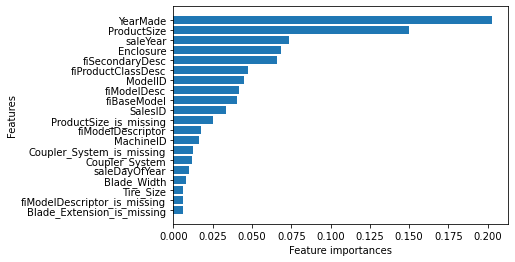

In [74]:
plot_features(X_train.columns, ideal_model.feature_importances_)

### Now we can see if we can improve the model by checking the top features, and tuning according to these features

**Question to finish** Why might knowning the feature importances of a trained machine learning model be helpful?

**Final Challenge** What other machine learning model could you try on dataset? 
Hint: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html check out the regression section of this map, or try to look at something like CatBoost.ai or XGBoost.ai
